In [13]:
import csv
f = open('../data/daegu.csv', 'r', encoding='utf-8')
data = csv.reader(f)
print(data)
f.close()

In [10]:
f = open(r'C:\Users\PC\Desktop\AI_빅데이터 전문가 양성과정 6기\KDT6\EX_공공데이터\data\daegu.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')

count = 0
for row in data:
    if (count > 5):
        break
    else:
        print(row)
        count += 1
f.close()

['\ufeff날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
['\t1907-01-31', '143', '', '-7', '0.8']
['\t1907-02-01', '143', '', '', '']
['\t1907-02-02', '143', '', '', '']
['\t1907-02-03', '143', '', '', '']
['\t1907-02-04', '143', '', '', '']


In [17]:
fin = open(r'C:\Users\PC\Desktop\AI_빅데이터 전문가 양성과정 6기\KDT6\EX_공공데이터\data\daegu.csv', 'r', encoding='utf-8-sig')
data = csv.reader(fin, delimiter=',')

fout = open(r'C:\Users\PC\Desktop\AI_빅데이터 전문가 양성과정 6기\KDT6\EX_공공데이터\data\daegu_utf8.csv', 'w', newline='', encoding='utf-8-sig')
wr = csv.writer(fout)

for row in data:
    for i in range(len(row)):
        row[i] = row[i].replace('\t', '')
    print(row)
    wr.writerow(row)
    
fin.close()
fout.close()
print('파일저장완료')

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
['1907-01-31', '143', '', '-7', '0.8']
['1907-02-01', '143', '', '', '']
['1907-02-02', '143', '', '', '']
['1907-02-03', '143', '', '', '']
['1907-02-04', '143', '', '', '']
['1907-02-05', '143', '', '', '']
['1907-02-06', '143', '', '', '']
['1907-02-07', '143', '', '', '']
['1907-02-08', '143', '', '', '']
['1907-02-09', '143', '', '', '']
['1907-02-10', '143', '', '-3', '4.8']
['1907-02-11', '143', '', '', '']
['1907-02-12', '143', '', '', '']
['1907-02-13', '143', '', '', '']
['1907-02-14', '143', '', '', '']
['1907-02-15', '143', '', '', '']
['1907-02-16', '143', '', '', '']
['1907-02-17', '143', '', '', '']
['1907-02-18', '143', '', '', '']
['1907-02-19', '143', '', '', '']
['1907-02-20', '143', '', '-3.4', '7.6']
['1907-02-21', '143', '', '', '']
['1907-02-22', '143', '', '', '']
['1907-02-23', '143', '', '', '']
['1907-02-24', '143', '', '', '']
['1907-02-25', '143', '', '', '']
['1907-02-26', '143', '', '', '']
['1907-02-27', '143

In [31]:
def get_minmax_temp(data):
    # 최고 기온 및 최소 기온의 날짜 구하기
    header = next(data)
    
    min_temp = 100
    min_date = ''
    
    max_temp = -999
    max_date = ''
    
    for row in data:
        
        if (row[3] == ''):
            row[3] = 100
        row[3] = float(row[3])  # 문자열은 바꿀수 없다??
        
        if (row[4] == ''):
            row[4] = -999
        row[4] = float(row[4])
        
        
        # 기온 업데이트
        if row[3] < min_temp:
            min_temp = row[3]
            min_date = row[0]
        if row[4] > max_temp:
            max_temp = row[4]
            max_date = row[0]
            
    print('_' * 50)
    print(f"대구 최저 기온 날짜: {min_date}, 온도: {min_temp}")
    print(f"대구 최고 기온 날짜: {max_date}, 온도: {max_date}")
    
def main():
    f = open(r'C:\Users\PC\Desktop\AI_빅데이터 전문가 양성과정 6기\KDT6\EX_공공데이터\data\daegu_utf8.csv', encoding='utf-8-sig')
    data = csv.reader(f)
    get_minmax_temp(data)
    f.close()
    
main()

__________________________________________________
대구 최저 기온 날짜: 1923-01-19, 온도: -20.2
대구 최고 기온 날짜: 1942-08-01, 온도: 1942-08-01


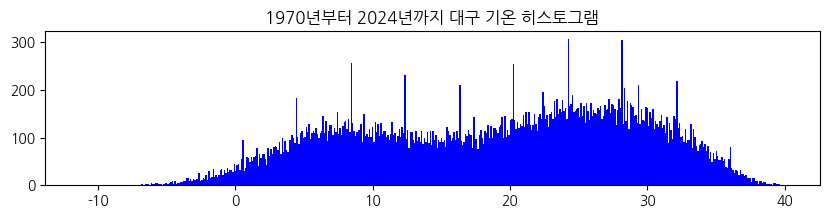

In [28]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open(r'C:\Users\PC\Desktop\AI_빅데이터 전문가 양성과정 6기\KDT6\EX_공공데이터\data\daegu_utf8.csv', encoding='utf-8-sig')
data = csv.reader(f)
next(data)
result = []

for row in data:
    if (row[-1] != ''):
        result.append(float(row[-1]))
f.close()

plt.figure(figsize=(10,2))
plt.hist(result, bins=500, color='blue')
# plt.rcParams['axes.nuicode_minus'] = False        # 오류 나서 주석처리함
plt.title("1970년부터 2024년까지 대구 기온 히스토그램")
plt.show()

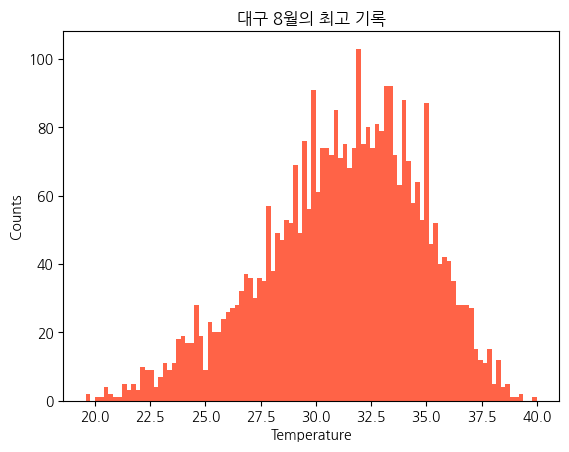

In [33]:
f = open(r'C:\Users\PC\Desktop\AI_빅데이터 전문가 양성과정 6기\KDT6\EX_공공데이터\data\daegu_utf8.csv', encoding='utf-8-sig')
data = csv.reader(f)
next(data)
aug = []

for row in data:
    if ((row[0] != '') and (row[4] != '')):
        month = row[0].split('-')[1]
        if month == '08':
            aug.append(float(row[-1]))
f.close()

plt.hist(aug, bins=100, color='tomato')
plt.title("대구 8월의 최고 기록")
plt.xlabel("Temperature")
plt.ylabel("Counts")
plt.show()

In [37]:
def draw_graph_on_date(month, day):
    f = open(r'C:\Users\PC\Desktop\AI_빅데이터 전문가 양성과정 6기\KDT6\EX_공공데이터\data\daegu_utf8.csv', encoding='utf-8-sig')
    data = csv.reader(f)
    next(data)
    result = []
    
    for row in data:
        if (row[-1] !=''):
            date_string = row[0].split('-')
            
            if ((date_string[1] == month) and (date_string[2] == day)):
                result.append(float(row[-1]))
                
    f.close()
    
    plt.figure(figsize=(15, 2))
    plt.plot(result, 'royalblue')
    plt.title(f"매년 {month}월 {day}일 최고 기온 변화")
    plt.show()

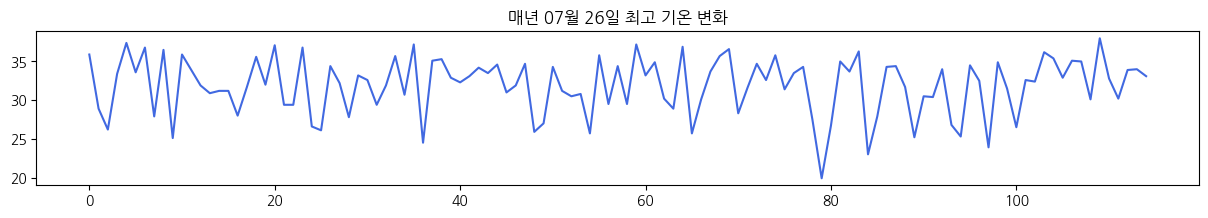

In [39]:
month, day = input('날짜(월 일: 01 01)를 입력하세요: ').split()
draw_graph_on_date(month, day)

In [48]:
def draw_lowhigh_graph(start_year, month, day):
    f = open(r'C:\Users\PC\Desktop\AI_빅데이터 전문가 양성과정 6기\KDT6\EX_공공데이터\data\daegu_utf8.csv', encoding='utf-8-sig')
    data = csv.reader(f)
    next(data)
    
    high_temp = []
    low_temp = []
    x_year = []
    
    for row in data:
        if (row[-1] != ''):
            date_string = row[0].split('-')
            
            if int(date_string[0]) >= start_year:
                if ((int(date_string[1]) == month) and (int(date_string[2]) == day)):
                    high_temp.append(float(row[-1]))
                    low_temp.append(float(row[-2]))
                    x_year.append(date_string[0])
    f.close()
    
    plt.figure(figsize=(20,4))
    plt.plot(x_year, high_temp, color='red', marker='o', label='최고기온')
    plt.plot(x_year, low_temp, color='skyblue', marker='s', label='최저기온')
    
    plt.title(f"{start_year} 이후 {month}월 {day}일의 기온변화 그래프")
    plt.xlabel("year")
    plt.ylabel("temperature")
    plt.legend(loc='upper left')
    plt.show()

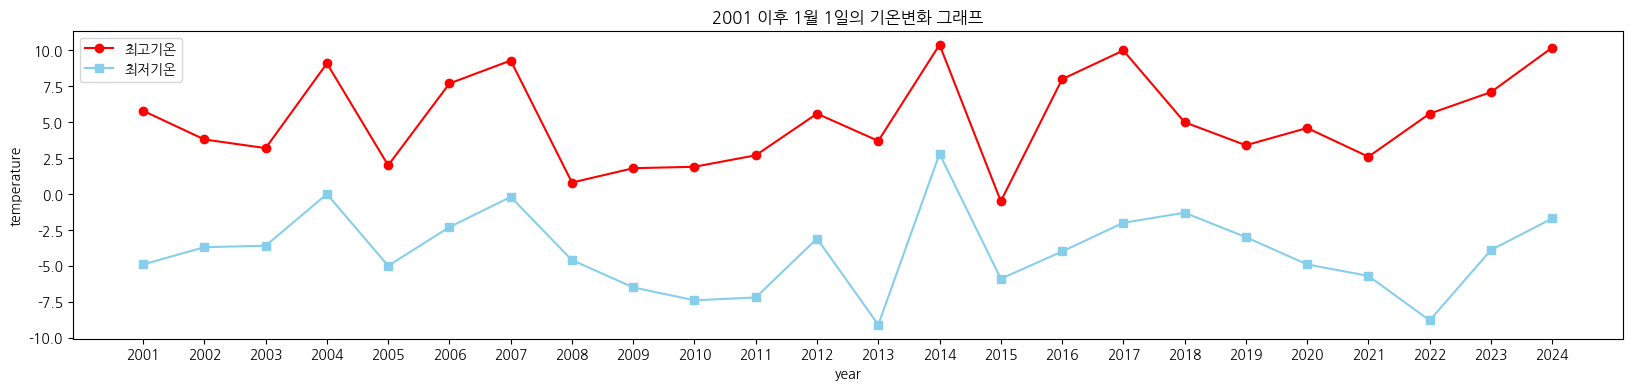

In [47]:
draw_lowhigh_graph(2001, 1, 1)

In [61]:
import pandas as pd

file_path = '../data/daegu_utf8.csv'

In [62]:
weather_df = pd.read_csv(file_path, encoding='utf-8-sig')
print(weather_df.columns)
print(weather_df['날짜'].dtype)

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')
object


In [63]:
weather_df.columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온']
print(weather_df.columns)

Index(['날짜', '지점', '평균기온', '최저기온', '최고기온'], dtype='object')


In [64]:
weather_df['날짜'] = pd.to_datetime(weather_df['날짜'], format='%Y-%m-%d')
print(weather_df['날짜'].dtype)

datetime64[ns]


In [65]:
print(weather_df.head())
print(weather_df.shape)
num_rows = weather_df.shape[0]
num_missing = num_rows - weather_df.count()
print(num_missing)

          날짜     지점  평균기온  최저기온  최고기온
0 1907-01-31  143.0   NaN  -7.0   0.8
1 1907-02-01  143.0   NaN   NaN   NaN
2 1907-02-02  143.0   NaN   NaN   NaN
3 1907-02-03  143.0   NaN   NaN   NaN
4 1907-02-04  143.0   NaN   NaN   NaN
(42887, 5)
날짜        1
지점        1
평균기온    704
최저기온    630
최고기온    632
dtype: int64


In [66]:
weather_df = weather_df.dropna(axis=0)
print(weather_df.count())
print(weather_df.head())

날짜      42180
지점      42180
평균기온    42180
최저기온    42180
최고기온    42180
dtype: int64
            날짜     지점  평균기온  최저기온  최고기온
701 1909-01-01  143.0  -4.1  -8.0   0.1
702 1909-01-02  143.0  -0.8  -6.7   6.1
703 1909-01-03  143.0   1.0  -2.4   3.6
704 1909-01-04  143.0   4.2   0.0   9.2
705 1909-01-05  143.0   3.4  -0.4   9.0


In [67]:
weather_df.to_csv('../data/daegu_utf8_df.csv', index=False, mode='w', encoding='utf-8-sig')

In [68]:
print("특정 연도와 달의 최고, 최저 기온 평균값 계산")

year_df = weather_df[weather_df['날짜'].dt.year == 2023]
month_df = year_df[year_df['날짜'].dt.month == 8]
print(month_df.head())

특정 연도와 달의 최고, 최저 기온 평균값 계산
              날짜     지점  평균기온  최저기온  최고기온
42551 2023-08-01  143.0  29.7  24.9  34.8
42552 2023-08-02  143.0  30.0  23.9  34.7
42553 2023-08-03  143.0  31.5  27.0  37.7
42554 2023-08-04  143.0  30.5  26.0  34.7
42555 2023-08-05  143.0  31.5  25.7  37.2


In [69]:
max_temp_mean = round(month_df['최고기온'].mean(), 1)
min_temp_mean = round(month_df['최저기온'].mean(), 1)

print(f"2023년 8월 최저기온 평균: {min_temp_mean}, 최고기온 평균: {max_temp_mean}")

2023년 8월 최저기온 평균: 24.0, 최고기온 평균: 31.9


In [89]:
def draw_two_plot(title, x_data, max_temp_list1, label_y1, max_temp_list2, label_y2):
    
    # 그래프 그리는 함수
    plt.figure(figsize=(10,4))
    plt.plot(x_data, max_temp_list1, marker='s', markersize=6, color='blue', label=label_y1)
    plt.plot(x_data, max_temp_list2, marker='s', markersize=6, color='red', label=label_y2)
    
    plt.title(title)
    # plt.xlabel(x_data)
    plt.ylabel('기온')
    plt.legend(loc='upper left', ncol=2)
    
    plt.show()

In [90]:
def main():
    search_month = int(input("비교할 월을 입력하세요: "))
    
    weather_df = pd.read_csv('../data/daegu_utf8_df.csv', encoding='utf-8-sig')
    weather_df['날짜'] = pd.to_datetime(weather_df['날짜'], format='%Y-%m-%d')
    
    first_decade_max_temp_list = [0]*10
    second_decade_max_temp_list = [0]*10
    
    first_decade = 1990
    second_decade = 2010
    
    # 저거 형변환을 해서 계산해야하나....
    # 리스트에 넣을때 형을 지정해주면 np.float(xx) 형태로 안나옴
    for year in range(10):
        first_decade_df = weather_df[(weather_df['날짜'].dt.year == first_decade + year) & (weather_df['날짜'].dt.month == search_month)]
        # first_decade_df['최고기온'].astype('float')
        # first_decade_max_temp_list.append(round(first_decade_df['최고기온'].mean(), 1))
        first_decade_max_temp_list[year] = float(round(first_decade_df['최고기온'].mean(), 1))
        
        second_decade_df = weather_df[(weather_df['날짜'].dt.year == second_decade + year) & (weather_df['날짜'].dt.month == search_month)]
        # second_decade_df['최고기온'].astype('float')
        # second_decade_max_temp_list.append(round(second_decade_df['최고기온'].mean(), 1))
        second_decade_max_temp_list[year] = float(round(second_decade_df['최고기온'].mean(), 1))
        
    # 데이터 확인
    print(f"{first_decade}년대 {search_month}월 최고 기온 평균: {first_decade_max_temp_list}")
    print(f"{second_decade}년대 {search_month}월 최고 기온 평균: {second_decade_max_temp_list}")
    
    first_decade_high_temp_mean = round(sum(first_decade_max_temp_list)/len(first_decade_max_temp_list), 1)
    second_decade_high_temp_mean = round(sum(second_decade_max_temp_list)/len(second_decade_max_temp_list), 1)
    
    print(f"{first_decade}년대 {search_month}월 전체 최고 기온 평균: {first_decade_high_temp_mean}")
    print(f"{second_decade}년대 {search_month}월 전체 최고 기온 평균: {second_decade_high_temp_mean}")
    
    x_data = [x for x in range(10)]
    draw_two_plot(f"{search_month}월 최고 기온 평균 비교", x_data,
                  first_decade_max_temp_list, str(first_decade)+'년대',
                  second_decade_max_temp_list, str(second_decade)+'년대')

1990년대 1월 최고 기온 평균: [4.6, 5.7, 7.5, 5.2, 6.7, 6.0, 6.2, 5.7, 5.6, 6.8]
2010년대 1월 최고 기온 평균: [5.0, 2.2, 5.1, 4.8, 8.1, 6.8, 4.3, 6.3, 4.0, 7.3]
1990년대 1월 전체 최고 기온 평균: 6.0
2010년대 1월 전체 최고 기온 평균: 5.4


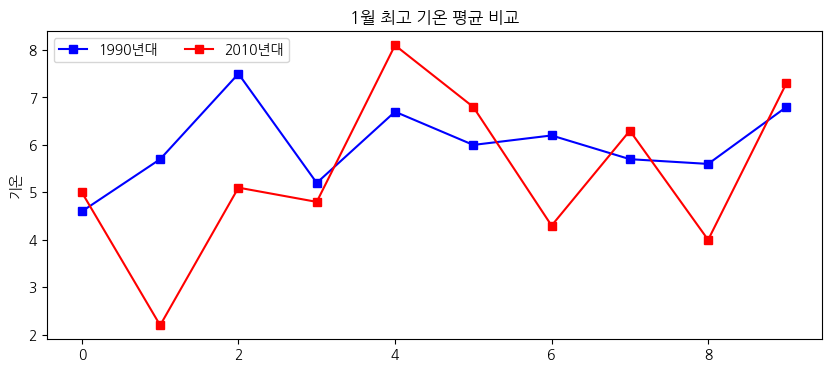

In [91]:
main()